# TUGAS PRAKTIKUM 12 METODE NUMERIK
__Solusi Persamaan Differensial Biasa (PDB) 1__

__Kelompok : AKT02__

__Anggota :__ 

```1. Antonius Aditya Rizky Wijaya (G5402221003)```

```2. Jokhanal Paskal Bastanta Brahmana (G5402221008)```

```3. Citra Dewi (G5402221035)```

```4. Muh. Fadhil Maulana Mulhayat (G5402221041)```

```5. Amanda Citra Lestari (G5402221048)```

```6. Khansa Paramytha Nareswari (G5402221062)```

<hr style="border:2px solid black"> </hr>

### __Soal 1__

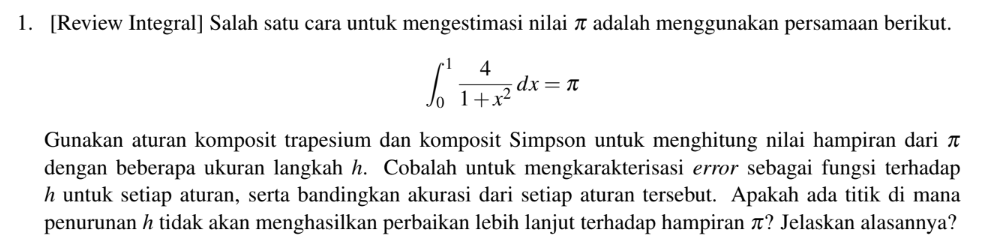

In [1]:
using Printf

# Fungsi Aturan Komposit Simpson
function kompsimp(f, a, b, n)
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in 1:n-1
        xi = a + i*h
        sum += i % 2 == 0 ? 2 * f(xi) : 4 * f(xi)
    end
    return h/3 * sum
end

# Fungsi yang diintegralkan
f(x) = 4 / (1 + x^2)

# Nilai π yang asli
pi_true = π

# Batas rentang
a, b = 0, 1

# Hitung π dan error dengan Aturan Komposit Simpson
println("\nAturan Komposit Simpson:")

# Mencari nilai hampiran π dengan beberapa nilai n (jumlah subinterval)
for n in [1, 3, 5, 7, 9, 11, 13, 15, 17]
    approx_pi = kompsimp(f, a, b, n)
    error = abs(approx_pi - pi_true)
    @printf("n= %7d, π= %.10f, error= %.10f\n", n, approx_pi, error)
end


Aturan Komposit Simpson:
n=       1, π= 2.0000000000, error= 1.1415926536
n=       3, π= 2.8820512821, error= 0.2595413715
n=       5, π= 2.9949281181, error= 0.1466645355
n=       7, π= 3.0395522060, error= 0.1020404476
n=       9, π= 3.0634034352, error= 0.0781892184
n=      11, π= 3.0782317967, error= 0.0633608569
n=      13, π= 3.0883382248, error= 0.0532544288
n=      15, π= 3.0956667315, error= 0.0459259221
n=      17, π= 3.1012235666, error= 0.0403690870


In [2]:
function komptrap(f,a,b,M)
  h = (b-a)/M;
  s = 0;
  # Hitung nilai sigma
  for k = 1:M-1
    x = a+k*h;
    s = s+f(x);
  end
  # Hitung hasil integral komposit trapesium
  y = h/2*(f(a)+f(b)+2*s)
end

a = 0;
b = 1;
f(x) = 4/(1+x^2);
M = [5,10,15,20,25,30];
h = (b-a)./M;
y = Array{Float64}(undef,length(M),1)
for i = 1:length(M)
    y[i] = komptrap(f,a,b,M[i]);
end

yeks = pi;
err = abs.(y.-yeks);
P = [M h y err]

6×4 Matrix{Float64}:
  5.0  0.2        3.13493  0.00666654
 10.0  0.1        3.13993  0.00166666
 15.0  0.0666667  3.14085  0.000740741
 20.0  0.05       3.14118  0.000416667
 25.0  0.04       3.14133  0.000266667
 30.0  0.0333333  3.14141  0.000185185

In [3]:
err[2:end]./err[1:end-1]

5-element Vector{Float64}:
 0.2500044607749534
 0.444444869007794
 0.5625000904205174
 0.6400000281139187
 0.6944444554003569

**Kesimpulan**  
Semakin banyak subinterval yang digunakan, semakin kecil lebar masing-masing subintervalnya, dan akurasi pendekatan integral semakin meningkat. Dengan demikian, kesalahan dalam perkiraan nilai π  juga semakin kecil. Namun, peningkatan jumlah subinterval juga berarti peningkatan beban komputasi. Oleh karena itu, diperlukan keseimbangan antara akurasi dan efisiensi komputasi dalam memilih jumlah subinterval yang tepat. Pada hasil yang diberikan terlihat aturan komposit simpson lebih akurat dibandingkan aturan komposit trapesium dengan bukti galat error yang dihasilkan oleh metode komposit simpson.

<hr style="border:2px solid black"> </hr>

### __Soal 2__
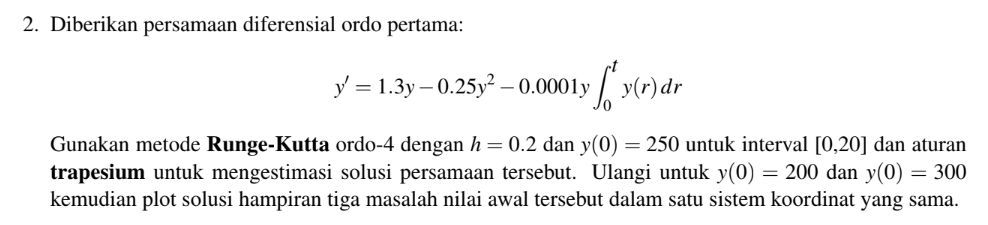

In [4]:
function aturantrapesium(f, a, b, n)
    h = (b - a) / n
    sum = 0.5 * (f(a) + f(b))
    for i in 1:n-1
        sum += f(a + i*h)
    end
    return h * sum
end

aturantrapesium (generic function with 1 method)

In [5]:
function rungekutta(f,a,b,y0,M)
    M = Int(M)
    h = (b-a)/M
    T = zeros(M+1)
    Y = zeros(M+1)
    T[1] = a
    Y[1] = y0
    for k = 1:M
        f1 = f(T[k], Y[k])
        f2 = f(T[k]+h/2, Y[k]+f1*h/2)
        f3 = f(T[k]+h/2, Y[k]+f2*h/2)
        f4 = f(T[k]+h, Y[k]+f3*h)
        Y[k+1] = Y[k] + h/6*(f1+2*f2+2*f3+f4)
        T[k+1] = T[k] + h
    end
    return T, Y
end

rungekutta (generic function with 1 method)

In [6]:
function f(t, y)
    return 1.3 * y - 0.25 * y^2 - 0.0001 * y * aturantrapesium(t -> y, 0, t, 1000)
end

f (generic function with 2 methods)

In [7]:
a = 0.0
b = 20
h = 1/5
M = (b - a) / h
y_values = [250, 200, 300] 
solutions = []

for y0 in y_values
    t, y = rungekutta(f, a, b, y0, M)
    push!(solutions, (t, y))
end

In [8]:
for (i, (t, y)) in enumerate(solutions)
    println("Solusi untuk y(0) = $(y_values[i]):")
    for j in 1:length(t)
        println("y = $(y[j])")
    end
    println()
end

Solusi untuk y(0) = 250:
y = 250.0
y = -5.819645800285037e13
y = -2.152998902061435e196
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf
y = -Inf

Solusi untuk y(0) = 200:
y = 

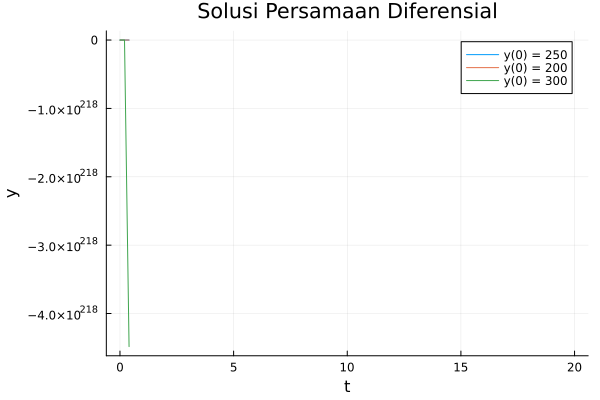

In [9]:
using Plots
plt = plot(title="Solusi Persamaan Diferensial", xlabel="t", ylabel="y", legend=:topright)
for (i, (t, y)) in enumerate(solutions)
    plot!(plt, t, y, label="y(0) = $(y_values[i])")
end
display(plt)

<hr style="border:2px solid black"> </hr>

### __Soal 3__
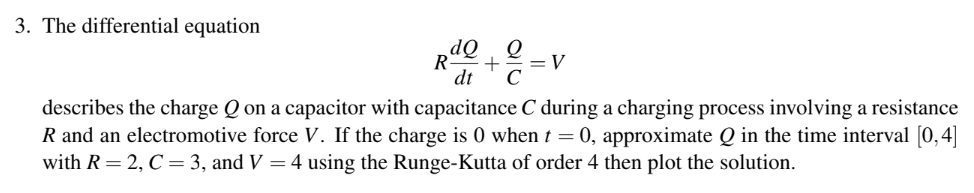

In [10]:
#%%METODE RUNGE-KUTTA ORDE 4
#% sol = rungekutta(f,a,b,y0,M)
#% Input  : f    -> fungsi f(t,y)
#%          a,b  -> batas ujung selang I(t) : a<=t<=b
#%          y0   -> nilai awal y(a)=y0
#%          M    -> banyaknya sub-interval
#% Output : sol  -> solusi PD, sol=[T,Y]
using Plots
function rungekutta(f,a,b,y0,M)
    M = Int(M)
    h = (b-a)/M;
    T = a:h:b;
    Y = Array{Float64}(undef,length(T),1) 
    Y[1] = y0;
    for k = 1:M
        f1 = f(T[k]     ,Y[k]        );
        f2 = f(T[k]+h/2 ,Y[k]+f1*h/2 );
        f3 = f(T[k]+h/2 ,Y[k]+f2*h/2 );
        f4 = f(T[k]+h   ,Y[k]+f3*h   );
        Y[k+1] = Y[k] + h/6*(f1+2*f2+2*f3+f4);
    end
    sol = [T Y];
end

rungekutta (generic function with 1 method)

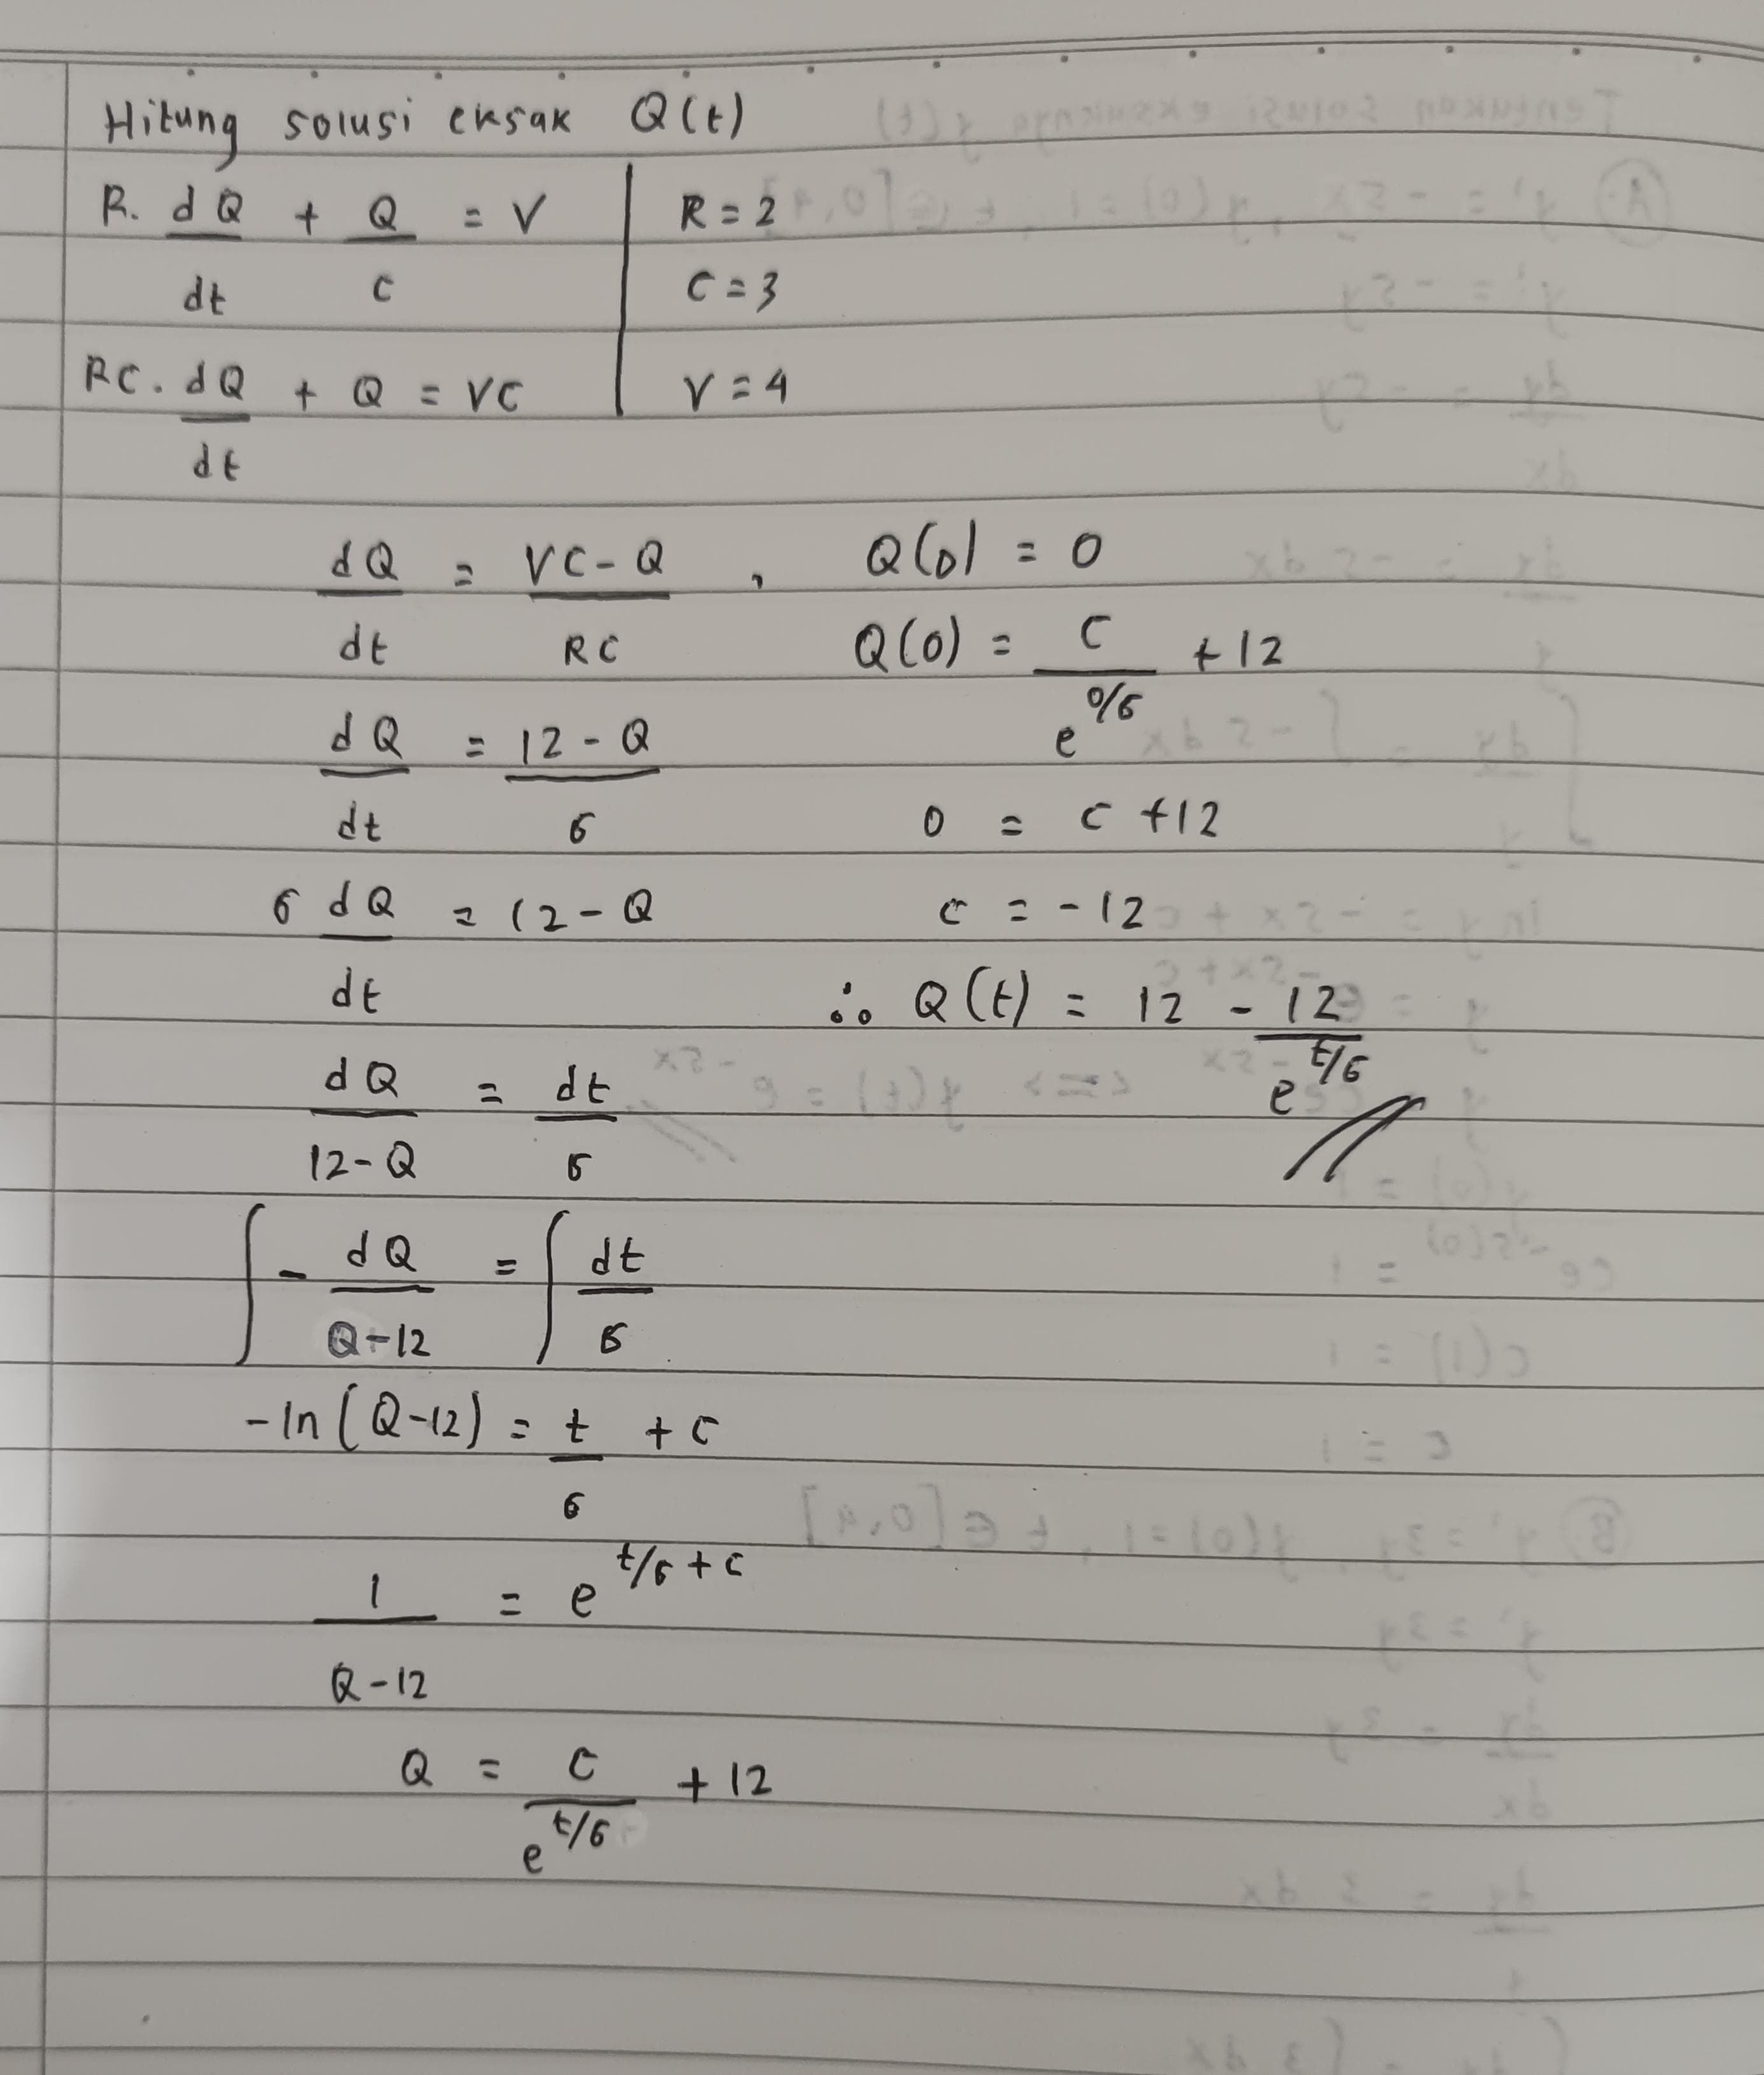

In [11]:
R = 2;
C = 3;
V = 4;
f(t,Q) = (V*C - Q) / (R * C);
y0 = 0;
a = 0;
b = 4;
h = 1/2;
M = (b-a)/h;
solusi1 = rungekutta(f,a,b,y0,M)

9×2 Matrix{Float64}:
 0.0  0.0
 0.5  0.959467
 1.0  1.84222
 1.5  2.65439
 2.0  3.40162
 2.5  4.08911
 3.0  4.72163
 3.5  5.30358
 4.0  5.83899

In [12]:
h = 1/4;
M = (b-a)/h;
solusi2 = rungekutta(f,a,b,y0,M)

17×2 Matrix{Float64}:
 0.0   0.0
 0.25  0.489727
 0.5   0.959467
 0.75  1.41004
 1.0   1.84222
 1.25  2.25676
 1.5   2.65439
 1.75  3.03579
 2.0   3.40162
 2.25  3.75253
 2.5   4.08911
 2.75  4.41196
 3.0   4.72163
 3.25  5.01867
 3.5   5.30358
 3.75  5.57686
 4.0   5.83899

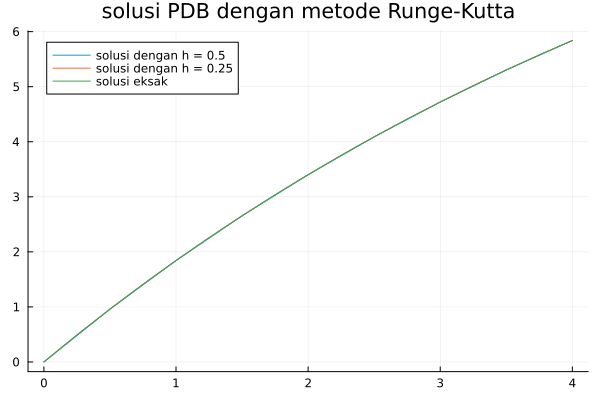

In [13]:
sol_eksak(t) = 12-(12/exp(t/6));
t1 = solusi1[:,1];
y1 = solusi1[:,2];
t2 = solusi2[:,1];
y2 = solusi2[:,2];
t = a:0.01:b
plot(t1,y1,label="solusi dengan h = 0.5",legend=:topleft)
plot!(t2,y2,label="solusi dengan h = 0.25")
plot!(t,sol_eksak.(t),label="solusi eksak") 
title!("solusi PDB dengan metode Runge-Kutta")

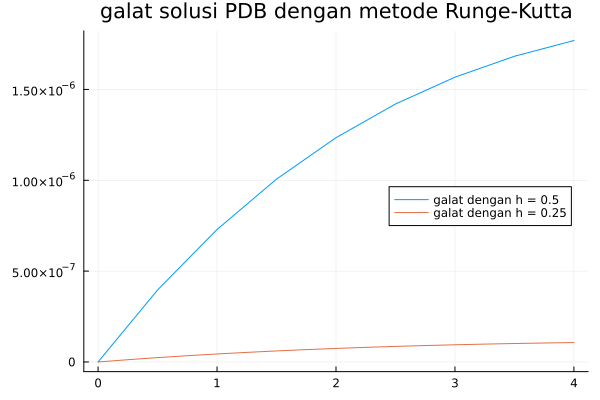

In [14]:
e1 = abs.(y1 - sol_eksak.(t1));
e2 = abs.(y2 - sol_eksak.(t2));
plot(t1,e1,label="galat dengan h = 0.5",legend=:right)
plot!(t2,e2,label="galat dengan h = 0.25") 
title!("galat solusi PDB dengan metode Runge-Kutta")

<hr style="border:2px solid black"> </hr>